In [406]:
import pandas as pd
from datetime import datetime
import wget
import seaborn as sns

# Download the data

Timeframe: Jan - May 2020

Source: https://s3.amazonaws.com/tripdata/index.html

In [10]:
#### Extract Files -only if they are not already downloaded ###

# Download Jan
url = "https://s3.amazonaws.com/tripdata/JC-202001-citibike-tripdata.csv.zip"
Jan = wget.download(url)
# Download Feb
url = "https://s3.amazonaws.com/tripdata/JC-202002-citibike-tripdata.csv.zip"    
Feb = wget.download(url)
# Download Mar   
url = "https://s3.amazonaws.com/tripdata/JC-202003-citibike-tripdata.csv.zip"
Mar = wget.download(url) 
# Download Apr
url = "https://s3.amazonaws.com/tripdata/JC-202004-citibike-tripdata.csv.zip"  
Apr = wget.download(url)  
# Download May
url = "https://s3.amazonaws.com/tripdata/JC-202005-citibike-tripdata.csv.zip"   
May = wget.download(url)

100% [........................................................] 655725 / 655725

In [427]:
# Read Jan file
Jan=pd.read_csv('./Resources/JC-202001-citibike-tripdata.csv')
Jan.shape

(26020, 15)

In [428]:
# Read Feb file
Feb=pd.read_csv('./Resources/JC-202002-citibike-tripdata.csv')
Feb.shape

(22962, 15)

In [429]:
# Read Mar file
Mar=pd.read_csv('./Resources/JC-202003-citibike-tripdata.csv')
Mar.shape

(17719, 15)

In [430]:
# Read Apr file
Apr=pd.read_csv('./Resources/JC-202004-citibike-tripdata.csv')
Apr.shape

(9268, 15)

In [431]:
# Read May file
May=pd.read_csv('./Resources/JC-202005-citibike-tripdata.csv')
May.shape

(25077, 15)

In [432]:
# Combine data using pd.concat
alldata = pd.concat([Jan,Feb,Mar,Apr,May], sort=False)
alldata.head(2)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,226,2020-01-01 00:04:50.1920,2020-01-01 00:08:37.0370,3186,Grove St PATH,40.719586,-74.043117,3211,Newark Ave,40.721525,-74.046305,29444,Subscriber,1984,2
1,377,2020-01-01 00:16:01.6700,2020-01-01 00:22:19.0800,3186,Grove St PATH,40.719586,-74.043117,3269,Brunswick & 6th,40.726012,-74.050389,26305,Subscriber,1989,2


In [433]:
# Get number of of rows and columns
alldata.shape

(101046, 15)

In [434]:
#Split date and time into separate columns
alldata['startdate'] = alldata['starttime'].str.slice(0,10)
alldata['starttime'] = alldata['starttime'].str.slice(10,24)
alldata['stopdate'] = alldata['stoptime'].str.slice(0,10)
alldata['stoptime'] = alldata['stoptime'].str.slice(10,24)
alldata.head(2)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,startdate,stopdate
0,226,00:04:50.1920,00:08:37.0370,3186,Grove St PATH,40.719586,-74.043117,3211,Newark Ave,40.721525,-74.046305,29444,Subscriber,1984,2,2020-01-01,2020-01-01
1,377,00:16:01.6700,00:22:19.0800,3186,Grove St PATH,40.719586,-74.043117,3269,Brunswick & 6th,40.726012,-74.050389,26305,Subscriber,1989,2,2020-01-01,2020-01-01


In [435]:
# Add Gender column values
alldata["gender"] = alldata["gender"].replace(
    {0:"Unknown",
     1:"Male",
     2:"Female"})
alldata.head(2)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,startdate,stopdate
0,226,00:04:50.1920,00:08:37.0370,3186,Grove St PATH,40.719586,-74.043117,3211,Newark Ave,40.721525,-74.046305,29444,Subscriber,1984,Female,2020-01-01,2020-01-01
1,377,00:16:01.6700,00:22:19.0800,3186,Grove St PATH,40.719586,-74.043117,3269,Brunswick & 6th,40.726012,-74.050389,26305,Subscriber,1989,Female,2020-01-01,2020-01-01


In [436]:
#Rename columns
alldata = alldata.rename(columns = {'tripduration':'Trip Duration (s)', 
                                    'starttime':'Start Time', 
                                    'startdate': 'Start Date',
                                    'stoptime': 'Stop Time',
                                    'stopdate': 'Stop Date',
                                    'start station id':'Start Station ID', 
                                    'start station name': 'Start Station Name',
                                    'start station latitude':'Start Station Lat', 
                                    'start station longitude': 'Start Station Lng',
                                    'end station id': 'End Station ID', 
                                    'end station name':'End Station Name',
                                    'end station latitude':'End Station Lat',
                                    'end station longitude':'End Station Lng', 
                                    'bikeid':'Bike ID',
                                    'usertype':'User Type',
                                    'birth year':'Birth Year',
                                    'gender':'Gender'})
# View updated column names
alldata.head(2)

,Trip Duration (s),Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Lat,Start Station Lng,End Station ID,End Station Name,End Station Lat,End Station Lng,Bike ID,User Type,Birth Year,Gender,Start Date,Stop Date
0,226,00:04:50.1920,00:08:37.0370,3186,Grove St PATH,40.719586,-74.043117,3211,Newark Ave,40.721525,-74.046305,29444,Subscriber,1984,Female,2020-01-01,2020-01-01
1,377,00:16:01.6700,00:22:19.0800,3186,Grove St PATH,40.719586,-74.043117,3269,Brunswick & 6th,40.726012,-74.050389,26305,Subscriber,1989,Female,2020-01-01,2020-01-01


In [437]:
# Transform date and time columns to datetimelike values
alldata['Start Date'] = pd.to_datetime(alldata['Start Date'], errors='coerce')
alldata['Stop Date'] = pd.to_datetime(alldata['Stop Date'], errors='coerce')

#Create seperate columns for Month, Day, Day of Week, and Year from start date
alldata['Start Month'] = alldata['Start Date'].dt.month
alldata['Start Day'] = alldata['Start Date'].dt.day
alldata['Start Year'] = alldata['Start Date'].dt.year
alldata['Start DoW'] = alldata['Start Date'].dt.day_name()

#Create seperate columns for Month, Day, Day of Week, and Year from stop date
alldata['Stop Month'] = alldata['Stop Date'].dt.month
alldata['Stop Day'] = alldata['Stop Date'].dt.day
alldata['Stop Year'] = alldata['Stop Date'].dt.year
alldata['Stop DoW'] = alldata['Stop Date'].dt.day_name()

alldata.head(2)

,Trip Duration (s),Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Lat,Start Station Lng,End Station ID,End Station Name,End Station Lat,...,Start Date,Stop Date,Start Month,Start Day,Start Year,Start DoW,Stop Month,Stop Day,Stop Year,Stop DoW
0,226,00:04:50.1920,00:08:37.0370,3186,Grove St PATH,40.719586,-74.043117,3211,Newark Ave,40.721525,...,2020-01-01,2020-01-01,1,1,2020,Wednesday,1,1,2020,Wednesday
1,377,00:16:01.6700,00:22:19.0800,3186,Grove St PATH,40.719586,-74.043117,3269,Brunswick & 6th,40.726012,...,2020-01-01,2020-01-01,1,1,2020,Wednesday,1,1,2020,Wednesday


In [438]:
# Add a Trip Duration column representing minutes
alldata['Trip Duration (m)'] = alldata['Trip Duration (s)']/60
alldata['Trip Duration (m)'] = alldata['Trip Duration (m)'].map("{:.2f}".format).astype(float)

# Add a Trip Duration column representing hours
alldata['Trip Duration (h)'] = alldata['Trip Duration (m)']/60
alldata['Trip Duration (h)'] = alldata['Trip Duration (h)'].map("{:.2f}".format).astype(float)

alldata.head(2)

,Trip Duration (s),Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Lat,Start Station Lng,End Station ID,End Station Name,End Station Lat,...,Start Month,Start Day,Start Year,Start DoW,Stop Month,Stop Day,Stop Year,Stop DoW,Trip Duration (m),Trip Duration (h)
0,226,00:04:50.1920,00:08:37.0370,3186,Grove St PATH,40.719586,-74.043117,3211,Newark Ave,40.721525,...,1,1,2020,Wednesday,1,1,2020,Wednesday,3.77,0.06
1,377,00:16:01.6700,00:22:19.0800,3186,Grove St PATH,40.719586,-74.043117,3269,Brunswick & 6th,40.726012,...,1,1,2020,Wednesday,1,1,2020,Wednesday,6.28,0.10


In [439]:
# Add age column
alldata['Age'] = alldata['Stop Year'] - alldata['Birth Year'].astype(int)
alldata.head(2)

,Trip Duration (s),Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Lat,Start Station Lng,End Station ID,End Station Name,End Station Lat,...,Start Day,Start Year,Start DoW,Stop Month,Stop Day,Stop Year,Stop DoW,Trip Duration (m),Trip Duration (h),Age
0,226,00:04:50.1920,00:08:37.0370,3186,Grove St PATH,40.719586,-74.043117,3211,Newark Ave,40.721525,...,1,2020,Wednesday,1,1,2020,Wednesday,3.77,0.06,36
1,377,00:16:01.6700,00:22:19.0800,3186,Grove St PATH,40.719586,-74.043117,3269,Brunswick & 6th,40.726012,...,1,2020,Wednesday,1,1,2020,Wednesday,6.28,0.10,31


In [440]:
#Categorize users using the age bins (added "Age Group" columm)
age_bins = [10, 20, 30, 40, 50, 60, 70, 80, 150]
age_groups = ["Teens", "20s", "30s", "40s", "50s", "60s", "70s", "80+"]
alldata["Age Group"] = pd.cut(alldata["Age"], age_bins, labels=age_groups)
alldata.head(2)

,Trip Duration (s),Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Lat,Start Station Lng,End Station ID,End Station Name,End Station Lat,...,Start Year,Start DoW,Stop Month,Stop Day,Stop Year,Stop DoW,Trip Duration (m),Trip Duration (h),Age,Age Group
0,226,00:04:50.1920,00:08:37.0370,3186,Grove St PATH,40.719586,-74.043117,3211,Newark Ave,40.721525,...,2020,Wednesday,1,1,2020,Wednesday,3.77,0.06,36,30s
1,377,00:16:01.6700,00:22:19.0800,3186,Grove St PATH,40.719586,-74.043117,3269,Brunswick & 6th,40.726012,...,2020,Wednesday,1,1,2020,Wednesday,6.28,0.10,31,30s


In [397]:
# Check columns for spaces
alldata.columns

Index(['Trip Duration (s)', 'Start Time', 'Stop Time', 'Start Station ID',
       'Start Station Name', 'Start Station Lat', 'Start Station Lng',
       'End Station ID', 'End Station Name', 'End Station Lat',
       'End Station Lng', 'Bike ID', 'User Type', 'Birth Year', 'Gender',
       'Start Date', 'Stop Date', 'Start Month', 'Start Day', 'Start Year',
       'Start DoW', 'Stop Month', 'Stop Day', 'Stop Year', 'Stop DoW',
       'Trip Duration (m)', 'Trip Duration (h)', 'Age', 'Age Group'],
      dtype='object')

In [398]:
# Push combined CSV file to folder
alldata.to_csv("alldata.csv", index=False, header=True)

## Quick Analysis

In [399]:
# There are more subscribers than one-time customers
alldata['User Type'].value_counts()

Subscriber    80725
Customer      20321
Name: User Type, dtype: int64

In [400]:
# There are more male users than female users
alldata['Gender'].value_counts()

Male       65495
Female     24998
Unknown    10553
Name: Gender, dtype: int64

In [401]:
# Most users are in the 30s followed by 20s
alldata['Age Group'].value_counts()

30s      39099
20s      22439
50s      18796
40s      16022
60s       3829
Teens      581
70s        258
80+         22
Name: Age Group, dtype: int64

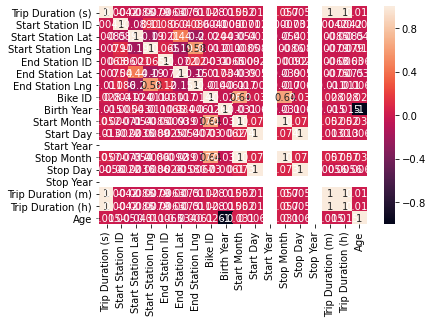

In [402]:
# Look for correlation in the data
sns.heatmap(alldata.corr(), annot=True)

In [403]:
# High level statistics of the data
alldata.describe()

,Trip Duration (s),Start Station ID,Start Station Lat,Start Station Lng,End Station ID,End Station Lat,End Station Lng,Bike ID,Birth Year,Start Month,Start Day,Start Year,Stop Month,Stop Day,Stop Year,Trip Duration (m),Trip Duration (h),Age
count,1.010460e+05,101046.000000,101046.000000,101046.000000,101046.000000,101046.000000,101046.000000,101046.000000,101046.000000,101046.000000,101046.000000,101046.0,101046.000000,101046.000000,101046.0,101046.000000,101046.000000,101046.000000
mean,1.305742e+03,3306.973359,40.722349,-74.046890,3306.343131,40.722073,-74.046516,38503.880896,1980.769471,2.845813,15.767591,2020.0,2.846090,15.764771,2020.0,21.762389,0.362688,39.230529
std,1.456367e+04,185.282761,0.007136,0.011564,187.848538,0.007108,0.011527,6275.063407,10.763364,1.522477,8.836535,0.0,1.522771,8.836917,0.0,242.727908,4.045470,10.763364
min,6.100000e+01,3184.000000,40.711130,-74.083639,83.000000,40.683826,-74.083639,14531.000000,1888.000000,1.000000,1.000000,2020.0,1.000000,1.000000,2020.0,1.020000,0.020000,16.000000
25%,2.630000e+02,3195.000000,40.717733,-74.050990,3194.000000,40.717733,-74.050656,29640.000000,1971.000000,1.000000,8.000000,2020.0,1.000000,8.000000,2020.0,4.380000,0.070000,31.000000
50%,4.450000e+02,3211.000000,40.721525,-74.044247,3210.000000,40.721124,-74.043845,42245.000000,1983.000000,3.000000,16.000000,2020.0,3.000000,16.000000,2020.0,7.420000,0.120000,37.000000
75%,1.026750e+03,3276.000000,40.727224,-74.038051,3276.000000,40.726012,-74.038051,42422.000000,1989.000000,4.000000,24.000000,2020.0,4.000000,24.000000,2020.0,17.115000,0.290000,49.000000
max,1.930668e+06,3792.000000,40.748716,-74.032108,3992.000000,40.842842,-73.942125,43866.000000,2004.000000,5.000000,31.000000,2020.0,6.000000,31.000000,2020.0,32177.800000,536.300000,132.000000
